<a href="https://colab.research.google.com/github/nour-said/-Customer-Segmentation/blob/main/first_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
https://github.com/nour-said/-Customer-Segmentation.git

In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")
original = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


*Data Exploration and Cleaning *


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
df.duplicated().sum()

np.int64(0)

Data Preprocessing

In [ ]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [ ]:
df.drop('CustomerID', axis = 1, inplace = True)

In [ ]:
df.rename(columns = {
    "Annual Income (k$)": "AnnualIncome",
    "Spending Score (1-100)": "SpendingScore"
}, inplace = True)

In [ ]:
df

,Gender,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


K-Means

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['AnnualIncome'] = scaler.fit_transform(df[['AnnualIncome']])
df['SpendingScore'] = scaler.fit_transform(df[['SpendingScore']])

In [ ]:
inertias = []
K_range = range(1, 11)

X = df[['Age', 'AnnualIncome', 'SpendingScore']]

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertias.append(km.inertia_)

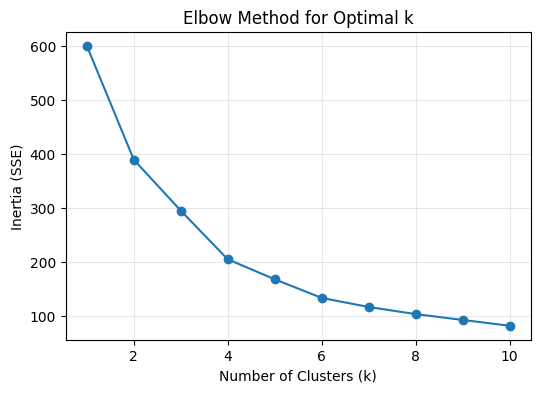

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method for Optimal k")
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
km = KMeans(n_clusters=5)
y_pred = km.fit_predict(df)

In [ ]:
df['lables'] = y_pred
df.head()

,Gender,Age,AnnualIncome,SpendingScore,lables
0,1,-1.424569,-1.738999,-0.434801,2
1,1,-1.281035,-1.738999,1.195704,2
2,0,-1.352802,-1.700830,-1.715913,1
3,0,-1.137502,-1.700830,1.040418,2
4,0,-0.563369,-1.662660,-0.395980,1


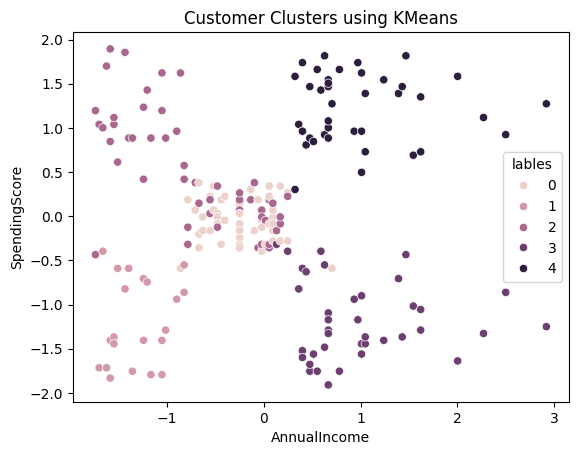

In [ ]:
sns.scatterplot(data=df, x='AnnualIncome', y='SpendingScore', hue='lables')
plt.title("Customer Clusters using KMeans")
plt.show()

## DBSCAN (bounus)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(df)
df['Cluster'] = labels

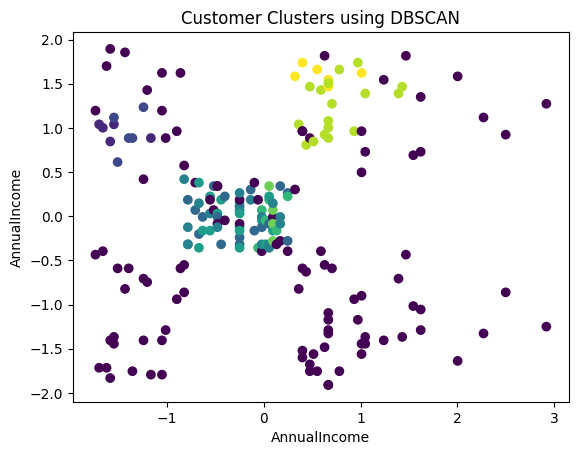

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['AnnualIncome'],
            df['SpendingScore'],
            c=df['Cluster'], cmap='viridis')
plt.xlabel("AnnualIncome")
plt.ylabel("AnnualIncome")
plt.title("Customer Clusters using DBSCAN")
plt.show()

In [ ]:
cluster_summary = df.groupby('Cluster')['SpendingScore'].mean()
print(cluster_summary)


Cluster
-1   -0.365582
 0    0.962775
 1    0.947246
 2    0.005176
 3   -0.042019
 4   -0.051762
 5    0.008873
 6    0.011646
 7    1.227675
 8    1.603330
Name: SpendingScore, dtype: float64


In [ ]:
df.groupby('Cluster')[['AnnualIncome', 'SpendingScore']].mean()


,AnnualIncome,SpendingScore
Cluster,,
-1,0.118340,-0.365582
0,-1.532884,0.962775
1,-1.410742,0.947246
2,-0.273717,0.005176
3,-0.295297,-0.042019
4,-0.324186,-0.051762
5,0.016795,0.008873
6,0.083591,0.011646
7,0.759976,1.227675
